In [178]:
# 기초 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 0. 문제 정의

### Title: `Titanic - Machine Learning from Disaster`

### Purpose: use machine Learning to create a model that predicts which passengers survived the Titanic shipwreck.
> In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

### Data description
> `Train.csv` will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.<br>
> `test.csv` dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s your job to predict these outcomes.

|Variable|Definition|Key|
|--------|----------|---|
|survive|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex| |
|Age|Age in years| |
|sibsp|# of siblings / spouses aboard the Titanic| |
|parch|# of parents / children aboard the Titanic| |
|ticket|Ticket number| |
|fare|Passenger fare| |
|cabin|Cabin number| |
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstwon, S = Southampton|

Variable Notes
> `pclass`: A proxy for socio-economic status (SES)
> - 1st = Upper  /  2nd = Middle  /   3rd = Lower
> 
> `age`: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
> 
> `sibsp`: The dataset defines family relations in this way...
> - Sibling = brother, sister, stepbrother, stepsister    /    Spouse = husband, wife (mistresses and fiancés were ignored)
>
> `parch`: The dataset defines family relations in this way...
> - Parent = mother, father    /    Child = daughter, son, stepdaughter, stepson
> - Some children travelled only with a nanny, therefore parch=0 for them.

### Evaluation
Goal
> It is your job to predict if a passenger survived the sinking of the Titanic or not.<br>
> For each in the test set, you must predict a 0 or 1 value for the variable.

Metric
> Your score is the percentage of passengers you correctly predict. This is known as accuracy.

Submission File Format
> You should submit a csv file with exactly 418 entries plus a header row. Your submission will show an error if you have extra columns (beyond PassengerId and Survived) or rows.

# 1. 데이터 불러오기

In [179]:
# 데이터의 파일 경로 설정 및 파일 이름 확인
import os

for dirpath, _, filenames in os.walk(os.getcwd()+'\data'):    # os.walk() returns a 3-tuple of strings(dirpath, dirnames, filenames)
    print('Absolute path of data file: ', dirpath)
    path = dirpath+'/'    # 불러오고자 하는 데이터의 base path 설정

    print('File names: ', end=' ')
    for filename in filenames:
        print(filename, end='   ')    # 파일 이름을 출력

Absolute path of data file:  c:\Users\prohe\OneDrive\바탕 화면\github_manage\Kaggle\Titanic - ML from Disaster\data
File names:  gender_submission.csv   test.csv   titanic.zip   train.csv   

In [180]:
# 데이터 불러오기
train_data = pd.read_csv(path + 'train.csv')
test_data = pd.read_csv(path + 'test.csv')

In [181]:
df = train_data.copy()  # EDA를 위한 원본 데이터 복사

# 2. EDA & Data preprocessing

In [182]:
df.head(5)    # 데이터 구조 살펴보기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [183]:
df.info()    # 데이터의 정보 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


> 알 수 있는 정보
> - row: 891 / column: 12
> - age에 Null 값이 꽤나 존재한다(177개).
> - Cabin은 대부분이 null 값이고, Embarked에도 2개 정도 빈 값이 보인다.

In [184]:
len(df['Ticket'].unique())    # Ticket 열의 고유값 확인

681

In [185]:
len(df['Cabin'].unique())    # Cabin 열의 고유값 확인

148

> 나의 생각
> - 이름은 생존자 예측에 있어서 별다른 도움이 되지 않을 것으로 보인다.
>   - 이름에 따라 성별이나 나이를 유추할 수도 있지만, 따로 정보가 있기 때문에 지워도 문제가 없을 것으로 생각된다.
> - PassengerId 또한 각 승객을 구분하기 위한 숫자이므로 예측을 위한 feature로써는 도움이 되지 않는다.
> - Ticket의 경우 891개의 행 중에서 고유값이 681개가 나오며, 특별한 규칙이 보이지 않기 때문에 생존자 예측에 있어서 큰 의미가 없는 것 같다.
>   - 혹시나 Ticket의 고유 번호에 따라 생각할 수 있는 정보는 다른 데이터로 대체할 수 있을 것 같다.(승선 위치 = Embarked / 객실 위치 = cabin)
> - cabin의 경우 객실 위치에 따라 생존에 유리한 영향을 끼쳤을 수 있을 것이라 생각이 들지만, Titanic의 단면도를 알지 않은 이상 판단하기 어려운 면이 있다.
>   - 또한 대부분의 값이 null값이기 때문에 지워도 괜찮을 것이라 판단된다.

In [186]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)    # PassengerId, Name, Ticket, Cabin 열 삭제

In [187]:
df.head(5)    # 삭제된 데이터 확인

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


> 이번에는 시각화를 통해 유의미한 정보를 찾아보자.

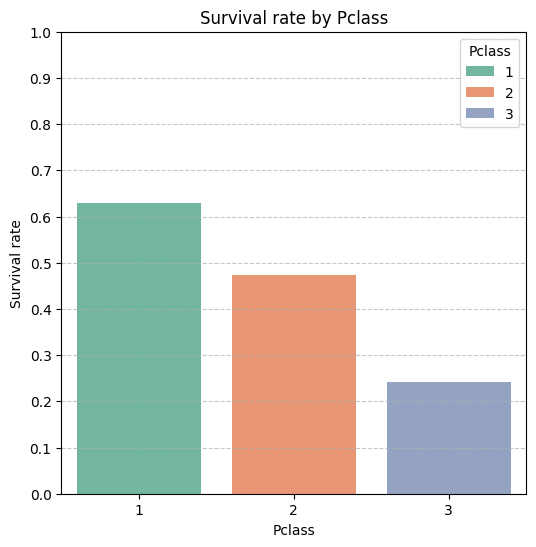

In [188]:
# Pclass에 따른 생존율 시각화
survival_rate_by_Pclass = df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

# 막대 차트로 시각화
plt.figure(figsize=(6, 6))
sns.barplot(data=survival_rate_by_Pclass, x='Pclass', y='Survived', palette='Set2', hue='Pclass')
plt.ylim(0, 1)
plt.ylabel('Survival rate')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Survival rate by Pclass')
plt.show()

> 높은 Pclass의 승객일수록 생존률이 좀 더 높았다. 이에 대해 좀 더 자세히 살펴보자.

In [189]:
# Pclass에 따른 요금 평균
Fare_by_Pclass = df[['Fare', 'Pclass']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=True)
Fare_by_Pclass

,Pclass,Fare
0,1,84.154687
1,2,20.662183
2,3,13.675550


In [190]:
df[df['Pclass'] == 1]['Fare'].min()     # Pclass 1의 최소값 확인

0.0

> Pclass를 나누는 요금의 기준을 살펴보기 위해 min()를 살펴보았더니, 요금이 0인 경우가 발견되었다..!

In [191]:
df[df['Fare']==0]    # 요금이 0인 데이터 확인

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
179,0,3,male,36.0,0,0,0.0,S
263,0,1,male,40.0,0,0,0.0,S
271,1,3,male,25.0,0,0,0.0,S
277,0,2,male,NaN,0,0,0.0,S
302,0,3,male,19.0,0,0,0.0,S
413,0,2,male,NaN,0,0,0.0,S
466,0,2,male,NaN,0,0,0.0,S
481,0,2,male,NaN,0,0,0.0,S
597,0,3,male,49.0,0,0,0.0,S
633,0,1,male,NaN,0,0,0.0,S


In [192]:
df['Fare'].sort_values().unique()[:10]      # 최하위 10개 Fare의 고유값 확인

array([0.    , 4.0125, 5.    , 6.2375, 6.4375, 6.45  , 6.4958, 6.75  ,
       6.8583, 6.95  ])

In [193]:
len(df[df['Fare'] == 0])    # 요금이 0인 데이터의 개수 확인

15

> 아무래도 요금이 0인 경우는 무언가 잘못 입력된 것 같다. 임의의 값을 채우도록 하자

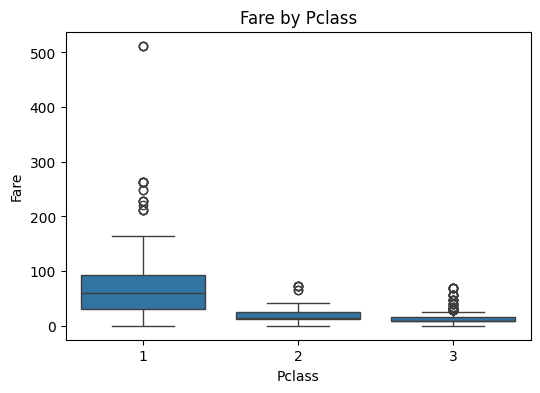

In [194]:
# Pclass별 Fare의 boxplot 시각화
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Pclass')
plt.show()

> 각 Pclass별 boxplot을 보았을 때 이상치가 꽤나 관찰되기 때문에 평균값보다는 중앙값으로 대체하자.

In [195]:
# Pclass 1이고 Fare가 0인 데이터를 해당 Pclass의 median 값(소수 4째자리까지)으로 대체
df.loc[(df['Pclass']==1) & (df['Fare']==0), 'Fare'] = df[df['Pclass']==1]['Fare'].median().round(4)

# Pclass 2이고 Fare가 0인 데이터를 해당 Pclass의 median 값(소수 4째자리까지)으로 대체
df.loc[(df['Pclass']==2) & (df['Fare']==0), 'Fare'] = df[df['Pclass']==2]['Fare'].median().round(4)

# Pclass 3이고 Fare가 0인 데이터를 해당 Pclass의 median 값(소수 4째자리까지)으로 대체
df.loc[(df['Pclass']==3) & (df['Fare']==0), 'Fare'] = df[df['Pclass']==3]['Fare'].median().round(4)

In [196]:
df.loc[df['Fare'] == 0]    # Fare가 0인 데이터 확인(정상적으로 대체가 되었는지 확인)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [197]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


> - 이번엔 Embarked 특성에 대해서 자세히 살펴보자.

In [198]:
df.Embarked.unique()    # Embarked 열의 고유값 확인

array(['S', 'C', 'Q', nan], dtype=object)

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


> 알 수 있는 정보
> - null 값이 2개 존재한다.
> - 고유값을 살펴보면 총 3가지의 값이 확인되며, 이를 통해 승객들이 3개의 항구에서 탑승했다는 점을 알 수 있다.

In [200]:
df[df['Embarked'].isnull()]   # Embarked가 NaN인 데이터 확인

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


> - 탑승한 항구의 위치는 해당 도시의 특성에 따라 생존에 영향을 미칠 수도 있을 것으로 생각된다.
>   - ex. 노인이 많은 도시, 부자가 많은 도시...
> - 하지만 이는 간접적인 특성이며, 다른 정보들을 통해 직접적인 특성을 알 수 있으므로 우선은 학습에서 제외하도록 하겠다.

In [201]:
df.drop(['Embarked'], axis=1, inplace=True)    # Embarked 열 삭제

In [202]:
df.head(5)  # 삭제된 데이터 확인

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [203]:
df.info()    # 데이터 정보 요약

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


> - Age에 null값이 많이 관측된다. 이를 적절하게 채워보자.

In [204]:
df[df['Age'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,male,NaN,0,0,8.4583
17,1,2,male,NaN,0,0,13.0000
19,1,3,female,NaN,0,0,7.2250
26,0,3,male,NaN,0,0,7.2250
28,1,3,female,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292
863,0,3,female,NaN,8,2,69.5500
868,0,3,male,NaN,0,0,9.5000
878,0,3,male,NaN,0,0,7.8958


In [205]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

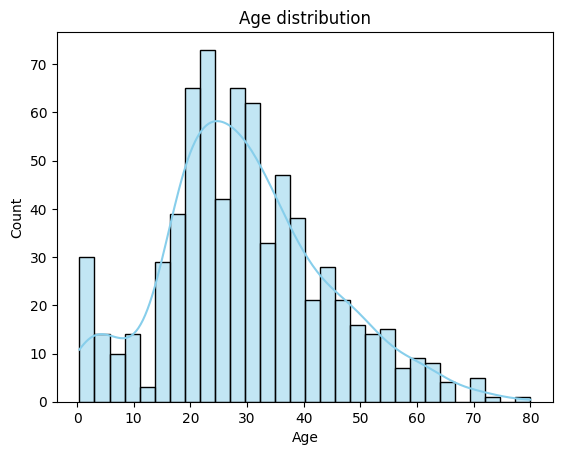

In [206]:
# Age의 분포 시각화
sns.histplot(df['Age'], bins=30, color='skyblue', kde=True)   # kde: kernel density estimation(밀도추정)
plt.title('Age distribution')
plt.show()

In [207]:
# Pclass별 Age의 요약통계량 확인
df[['Pclass', 'Age']].groupby(['Pclass'], as_index=False).describe()

Pclass    Age                                                    
          count       mean        std   min   25%   50%   75%   max
0      1  186.0  38.233441  14.802856  0.92  27.0  37.0  49.0  80.0
1      2  173.0  29.877630  14.001077  0.67  23.0  29.0  36.0  70.0
2      3  355.0  25.140620  12.495398  0.42  18.0  24.0  32.0  74.0

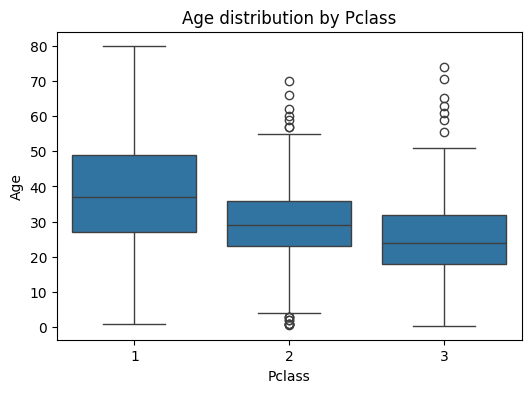

In [208]:
# Pclass별 Age의 분포 시각화
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age distribution by Pclass')
plt.show()

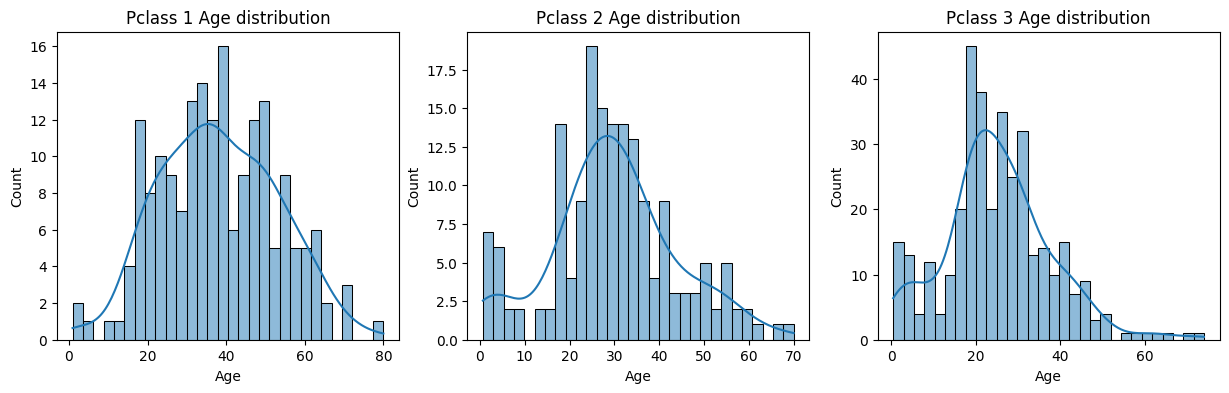

In [209]:
# Pclass별 Age 히스토그램 따로 시각화
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
sns.histplot(data=df[df['Pclass']==1], x='Age', bins=30, kde=True)
plt.title('Pclass 1 Age distribution')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['Pclass']==2], x='Age', bins=30, kde=True)
plt.title('Pclass 2 Age distribution')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['Pclass']==3], x='Age', bins=30, kde=True)
plt.title('Pclass 3 Age distribution')
plt.show()

> - Pclass별로 평균 나이가 다를 것이라는 추정이 어느정도 일치한 것 같다.
>   - null값은 Pclass별 중위값을 채우도록 하겠다.

In [210]:
# Age의 null값은 Pclass별 Age의 중앙값으로 대체
df['Age'] = df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'))

In [211]:
df.info()   # Age의 null값이 잘 대체되었는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.9+ KB


> - 이상치 처리는 우선 넘어가고, 모델 학습을 위한 feature engineering을 해보자.

# 3. Feature Engineering

In [212]:
df.head(5)    # 데이터 형태 확인

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


## 3-1. Categorical feature encoding

> - 데이터 중에서 categorical feature가 존재하므로 encoding 과정을 거쳐야 한다.
>   - 이때 Sex는 Nominal feature(명목형 자료)이므로 One-hot Encoding이 적합해보인다.
>   - 만일 Ordinal feature(순서형 자료)인 경우 Ordinal Encoding이 적절할 것이다.

In [213]:
# One-hot encoding of Sex feature
train_OHE_by_dummies = pd.get_dummies(df, columns=['Sex'], dtype=int)
train_OHE_by_dummies.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


> 단, `get_dummies`를 사용해서 OHE를 한다면, train과 test 데이터에 카테고리가 동일하지 않을 경우 문제가 생길 수 있다.
> - 만일 train에는 High, Middle, Low가 존재하고, test에는 High, Low만 존재한다면, get_dummies의 경우 test에서 Middle을 인식하지 못하고 High와 Low로만 구분한다.
> 
> 따라서 train 데이터의 특성을 학습할 수 있는 sklearn의 OneHotEncoder를 사용하자.

In [214]:
# sklearn을 통한 One-hot encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
# sparse=False: 벡터(array)를 반환 / sparse=True(default): 행렬(matrix)을 반환 / 1.2 version부터는 sparse가 sparse_output

sex_encoded = encoder.fit_transform(df[['Sex']])    # 이때 numpy 행렬을 입력해야 함에 주의할 것
# fit과 transform을 나누어 하는 경우
# encoder.fit(df[['Sex']])    # encoder 객체에 데이터를 적용
# sex_encoded = encoder.transform(df[['Sex']])    # 학습된 encoder 객체를 이용하여 데이터 변환

sex_encoded

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [215]:
encoder.categories_    # 인코딩된 범주 확인

[array(['female', 'male'], dtype=object)]

In [216]:
# 인코딩된 범주형 데이터를 DataFrame으로 변환 후 기존 데이터와 병합
train_OHE = pd.concat([df.drop(columns=['Sex']), pd.DataFrame(sex_encoded, columns=encoder.categories_[0])], axis=1)
# 인코딩된 범주(encoder.categories_)는 list로 반환되기 때문에 [0]을 통해 범주의 배열만 선택
train_OHE.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0.0,1.0
1,1,1,38.0,1,0,71.2833,1.0,0.0
2,1,3,26.0,0,0,7.9250,1.0,0.0
3,1,1,35.0,1,0,53.1000,1.0,0.0
4,0,3,35.0,0,0,8.0500,0.0,1.0


## 3-2. Feature scaling (Normalization/Standardization)

> - 이제 모든 feature가 숫자로 이루어졌으나, 각각의 feature마다 scale이 다르기 때문에 Scaling을 거친다.
> - feature scaling의 방법으로는 Normalization(정규화, min-max scaling)와 Standardization(정규화)가 존재한다.
>   - 일반적으로는 Standardization의 성능이 더 좋게 나오는 것으로 알려져 있으므로 이를 사용해보자.
> - 우선은 Age와 Fare를 정도만 scaling을 해보자.

In [217]:
# feature scaling of Age & Fare (Statndardization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_scaled = train_OHE.copy()

scaled_Age_Fare = scaler.fit_transform(train_scaled.loc[:, ['Age', 'Fare']])
train_scaled.loc[:, ['Age', 'Fare']] = scaled_Age_Fare
train_scaled

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,-0.533834,1,0,-0.512797,0.0,1.0
1,1,1,0.674891,1,0,0.778711,1.0,0.0
2,1,3,-0.231653,0,0,-0.499183,1.0,0.0
3,1,1,0.448255,1,0,0.411966,1.0,0.0
4,0,3,0.448255,0,0,-0.496662,0.0,1.0
...,...,...,...,...,...,...,...,...
886,0,2,-0.156107,0,0,-0.396824,0.0,1.0
887,1,1,-0.760469,0,0,-0.053945,1.0,0.0
888,0,3,-0.382743,1,2,-0.186054,1.0,0.0
889,1,1,-0.231653,0,0,-0.053945,0.0,1.0


> 모델을 학습시키전 test data에도 동일한 전처리를 진행하자.

In [220]:
# test data에도 동일한 전처리를 적용
test = test_data.copy()

# PassengerId, Name, Ticket, Cabin, Embarked 열 삭제
test.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

# Fare가 0인 경우 해당 Pclass의 median 값(소수 4째자리까지)으로 대체
for i in range(len(test['Pclass'].unique())):
    test.loc[(test['Pclass']==(i+1)) & (test['Fare']==0), 'Fare'] = train_data[train_data['Pclass']==(i+1)]['Fare'].median().round(4)

# Age의 null값은 Pclass별 Age의 중앙값으로 대체
test['Age'] = test['Age'].fillna(train_data.groupby('Pclass')['Age'].transform('median'))

# One-hot encoding
encoder = OneHotEncoder(sparse_output=False)
test_encoded = encoder.fit_transform(test[['Sex']])
test_OHE = pd.concat([test.drop(columns=['Sex']), pd.DataFrame(test_encoded, columns=encoder.categories_[0])], axis=1)

# feature scaling
scaler = StandardScaler()
test_scaled = test_OHE.copy()
scaled_Age_Fare = scaler.fit_transform(test_scaled.loc[:, ['Age', 'Fare']])
test_scaled.loc[:, ['Age', 'Fare']] = scaled_Age_Fare

In [221]:
test_scaled   # 전처리된 test data 확인

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,0.367534,0,0,-0.503251,0.0,1.0
1,3,1.339625,1,0,-0.518109,1.0,0.0
2,2,2.506134,0,0,-0.469955,0.0,1.0
3,3,-0.215720,0,0,-0.488321,0.0,1.0
4,3,-0.604557,1,1,-0.423370,1.0,0.0
...,...,...,...,...,...,...,...
413,3,-0.060186,0,0,-0.499295,0.0,1.0
414,1,0.717487,0,0,1.307685,1.0,0.0
415,3,0.678603,0,0,-0.513629,0.0,1.0
416,3,-0.060186,0,0,-0.499295,0.0,1.0


# 4. Model Traning

In [222]:
# feature와 label 분리
X_train = train_scaled.drop('Survived', axis=1)
y_train = train_scaled['Survived']
X_test = test_scaled

In [223]:
# 여러 가지 모델을 활용한 학습
from sklearn.linear_model import SGDClassifier          # 1. Linear Classifier: SGD(Stochastic Gradient Descent) Classifier
from sklearn.linear_model import LogisticRegression     # 2. Logistic Regression
from sklearn.svm import SVC                             # 3. Support Vector Machine
from sklearn.ensemble import RandomForestClassifier     # 4. Random Forest
from sklearn.ensemble import GradientBoostingClassifier # 5. Gradient Boosting

# 모델 객체 선언
random_seed = 42    # random seed 설정
clf1 = SGDClassifier(random_state=random_seed)
clf2 = LogisticRegression(random_state=random_seed)
clf3 = SVC(random_state=random_seed)
clf4 = RandomForestClassifier(random_state=random_seed)
clf5 = GradientBoostingClassifier(random_state=random_seed)

# 모델 학습
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train, y_train)
clf4.fit(X_train, y_train)
clf5.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [229]:
# 학습 성능 확인(X_train에 대해 예측을 하여 학습 성능을 확인)
x_pred1 = clf1.predict(X_train)
x_pred2 = clf2.predict(X_train)
x_pred3 = clf3.predict(X_train)
x_pred4 = clf4.predict(X_train)
x_pred5 = clf5.predict(X_train)

# 성능 지표 확인(정확도, MSE)
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

print(f'1. SGD Classifier          |  Accuracy : {accuracy_score(y_train, x_pred1):.4f},  MSE : {mean_squared_error(y_train, x_pred1):.4f}')
print(f'2. Logistic Regression     |  Accuracy : {accuracy_score(y_train, x_pred2):.4f},  MSE : {mean_squared_error(y_train, x_pred2):.4f}')
print(f'3. Support Vector Machine  |  Accuracy : {accuracy_score(y_train, x_pred3):.4f},  MSE : {mean_squared_error(y_train, x_pred3):.4f}')
print(f'4. Random Forest           |  Accuracy : {accuracy_score(y_train, x_pred4):.4f},  MSE : {mean_squared_error(y_train, x_pred4):.4f}')
print(f'5. Gradient Boosting       |  Accuracy : {accuracy_score(y_train, x_pred5):.4f},  MSE : {mean_squared_error(y_train, x_pred5):.4f}')

1. SGD Classifier          |  Accuracy : 0.8047,  MSE : 0.1953
2. Logistic Regression     |  Accuracy : 0.8047,  MSE : 0.1953
3. Support Vector Machine  |  Accuracy : 0.8305,  MSE : 0.1695
4. Random Forest           |  Accuracy : 0.9820,  MSE : 0.0180
5. Gradient Boosting       |  Accuracy : 0.8934,  MSE : 0.1066


In [241]:
# 각 모델의 교차 검증 수행
from sklearn.model_selection import cross_val_score
score1 = cross_val_score(clf1, X_train, y_train, cv=10, scoring='accuracy')
score2 = cross_val_score(clf2, X_train, y_train, cv=10, scoring='accuracy')
score3 = cross_val_score(clf3, X_train, y_train, cv=10, scoring='accuracy')
score4 = cross_val_score(clf4, X_train, y_train, cv=10, scoring='accuracy')
score5 = cross_val_score(clf5, X_train, y_train, cv=10, scoring='accuracy')

# 각 모델별 교차 검증 결과 출력
print('Cross-validation scores(accuracy)')
print(f'1. SGD Classifier          |  Mean : {score1.mean():.4f},  Standard deviation : {score1.std():.4f}')
print(f'2. Logistic Regression     |  Mean : {score2.mean():.4f},  Standard deviation : {score2.std():.4f}')
print(f'3. Support Vector Machine  |  Mean : {score3.mean():.4f},  Standard deviation : {score3.std():.4f}')
print(f'4. Random Forest           |  Mean : {score4.mean():.4f},  Standard deviation : {score4.std():.4f}')
print(f'5. Gradient Boosting       |  Mean : {score5.mean():.4f},  Standard deviation : {score5.std():.4f}')

Cross-validation scores(accuracy)
1. SGD Classifier          |  Mean : 0.7644,  Standard deviation : 0.0454
2. Logistic Regression     |  Mean : 0.7969,  Standard deviation : 0.0226
3. Support Vector Machine  |  Mean : 0.8261,  Standard deviation : 0.0280
4. Random Forest           |  Mean : 0.8183,  Standard deviation : 0.0474
5. Gradient Boosting       |  Mean : 0.8339,  Standard deviation : 0.0419


In [247]:
# 임의로 X_teste에서 Fare가 null인 경우 train_data의 중앙값으로 대체
X_test['Fare'] = X_test['Fare'].fillna(train_data['Fare'].median())
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Parch   418 non-null    int64  
 4   Fare    418 non-null    float64
 5   female  418 non-null    float64
 6   male    418 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 23.0 KB


In [248]:
# 그나마 전체적인 성능이 좋은 Gradient Boosting을 통해 test data에 대한 예측 수행
y_pred = clf5.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [250]:
submission = test_data[['PassengerId']].copy()
submission['Survived'] = y_pred
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [251]:
# submission 파일로 저장
submission.to_csv('submission.csv', index=False)    # index=False: index 열을 저장하지 않음

# 5. Hyper-parameter Tuning

> 모델의 성능을 더욱 높이기 위한 하이퍼파라미터 튜닝을 해보자.